## Welcome to the Browser Wars (1995 - )
<p><img src="https://assets.datacamp.com/production/project_1172/img/browser.png" alt="Browser on desktop, tablet, and phone"></p>
<p>In the mid 1990s, the First Browser War began with Netscape Navigator and Microsoft Internet Explorer fighting for dominance. By 2001, Internet Explorer was the clear winner, but it was not long before the Second Browser Wars began (2004-2017). This coincided with the rise of smartphones, which emphasized the need and competitiveness for more mobile-friendly versions of browsers. <a href="https://en.wikipedia.org/wiki/Browser_wars">[1]</a></p>
<p>In this notebook, we'll analyze the worldwide popularity of browsers over time using Google Trends. Although this won't give us direct market share figures, we can use Google Trends to get a sense of interest of a given browser over time and how that interest compares to other browsers. In particular, we will be looking at five major players over the past two decades: Mozilla Firefox (2002-), Apple's Safari (2002-), Google Chrome (2008-), Microsoft Internet Explorer (1995-2020), and Opera (1995-).</p>
<p>The dataset you will use was downloaded as a CSV from this <a href="https://trends.google.com/trends/explore?date=all&q=%2Fm%2F01dyhm,%2Fm%2F0168s_,%2Fm%2F04j7cyf,%2Fm%2F03xw0,%2Fm%2F01z7gs">Google Trends query</a> in mid-October of 2020. Here are the details:</p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/worldwide_browser_trends.csv</b></div>
This is a time series indexed by month with the search interest for each browser.
<ul>
    <li><b>Month:</b> each month from 2004-01 to 2020-10</li>
    <li><b>Firefox:</b> search interest for Firefox</li>
    <li><b>Safari:</b> search interest for Safari</li>
    <li><b>Google Chrome:</b> search interest for Chrome</li>
    <li><b>Internet Explorer:</b> search interest for Internet Explorer</li>
    <li><b>Opera:</b> search interest for Opera</li>
</ul>
</div>
<p>Google defines the values of search interest as:</p>
<blockquote>
  <p>Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.</p>
</blockquote>
<p>Best of luck and may the best browser win!</p>

In [1]:
import pandas as pd

df = pd.read_csv("datasets/worldwide_browser_trends.csv",parse_dates=['Month'], index_col='Month')

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 202 entries, 2004-01-01 to 2020-10-01
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Firefox            202 non-null    int64
 1   Safari             202 non-null    int64
 2   Google Chrome      202 non-null    int64
 3   Internet Explorer  202 non-null    int64
 4   Opera              202 non-null    int64
dtypes: int64(5)
memory usage: 9.5 KB


### Initial Observations
This plot shows the search interest trends for each browser. A value of 100 represents peak search interest, while other values are relative to this peak.


<Axes: xlabel='Month'>

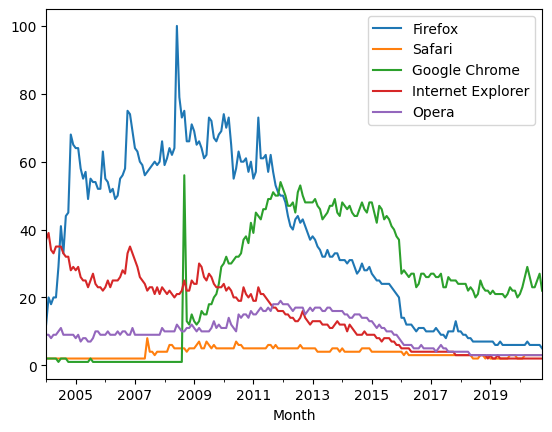

In [2]:
df.plot()

To reduce noise and highlight long-term trends, we calculate a 6-month rolling average for each browser.


In [3]:
#Question 1

rolling_six = df.rolling(window=6).mean()

print(rolling_six.head(10))

              Firefox  Safari  Google Chrome  Internet Explorer     Opera
Month                                                                    
2004-01-01        NaN     NaN            NaN                NaN       NaN
2004-02-01        NaN     NaN            NaN                NaN       NaN
2004-03-01        NaN     NaN            NaN                NaN       NaN
2004-04-01        NaN     NaN            NaN                NaN       NaN
2004-05-01        NaN     NaN            NaN                NaN       NaN
2004-06-01  19.833333     2.0       1.833333          35.500000  9.000000
2004-07-01  24.666667     2.0       1.833333          35.166667  9.333333
2004-08-01  26.833333     2.0       1.833333          34.166667  9.333333
2004-09-01  31.166667     2.0       1.833333          33.833333  9.500000
2004-10-01  35.333333     2.0       1.666667          33.666667  9.500000


<Axes: title={'center': '6 Month Roll'}, xlabel='Month'>

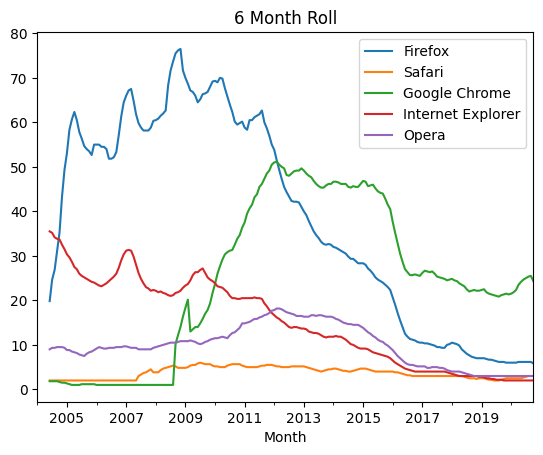

In [4]:
rolling_six.plot(title = "6 Month Roll")

Next, we calculate the quarterly (3-month) percentage change in search interest. This reveals major shifts and helps us identify pivotal moments in the browser wars.


In [5]:
### Question 2:

pct_change_quarterly = df.pct_change(3)*100
pct_change_quarterly = pct_change_quarterly.loc['2009':]

print(pct_change_quarterly.head(10))

              Firefox     Safari  Google Chrome  Internet Explorer      Opera
Month                                                                        
2009-01-01   4.545455  25.000000       0.000000           9.090909   0.000000
2009-02-01  -1.515152  20.000000       0.000000           9.090909  -9.090909
2009-03-01  -7.042254  40.000000     -13.333333          20.000000  -8.333333
2009-04-01  -7.246377   0.000000      23.076923          20.833333  -9.090909
2009-05-01  -6.153846 -16.666667      25.000000           8.333333   0.000000
2009-06-01  -6.060606   0.000000      15.384615         -16.666667  -9.090909
2009-07-01  14.062500  20.000000      12.500000          -6.896552   0.000000
2009-08-01  18.032787   0.000000      20.000000           0.000000  10.000000
2009-09-01   8.064516 -14.285714      33.333333          -4.000000  30.000000
2009-10-01  -9.589041 -16.666667      16.666667         -14.814815  10.000000


array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
       <Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
       <Axes: xlabel='Month'>], dtype=object)

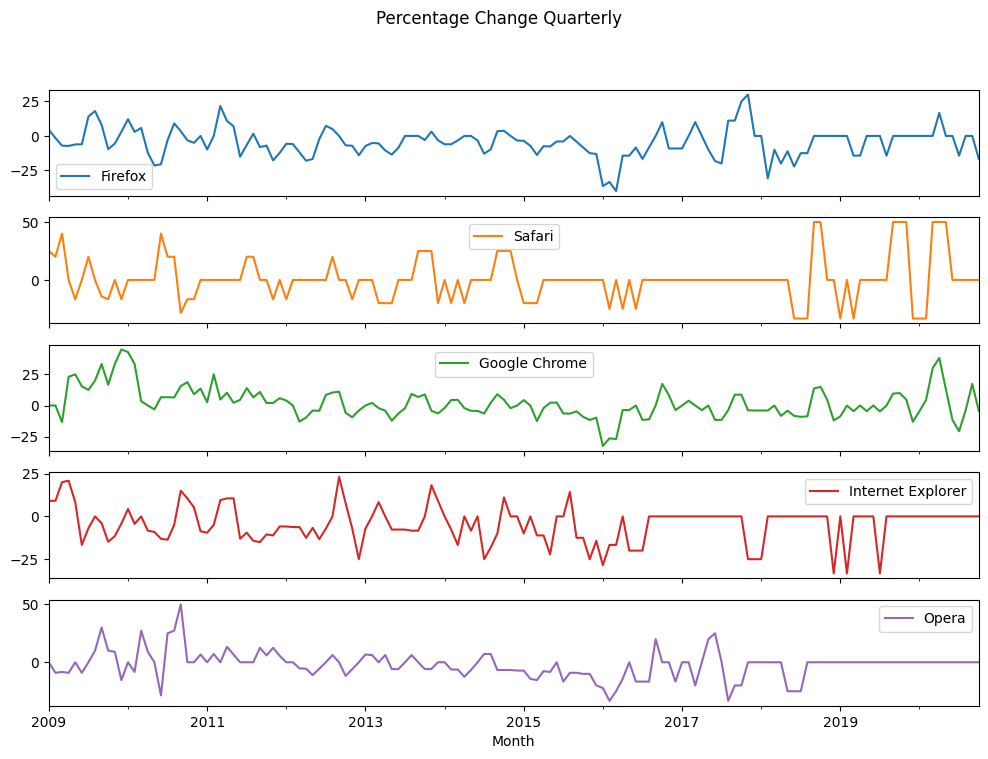

In [6]:
pct_change_quarterly.plot(title = "Percentage Change Quarterly", subplots=True, figsize=(12,8))

Google Chrome saw a rapid increase in popularity after its 2008 release. To capture this trend, we compare Chrome’s performance across selected years: 2009, 2012, 2015, and 2018.


In [7]:
### Question 3:

chrome_trends = pd.DataFrame()

for year in ['2009', '2012', '2015', '2018']:
    chrome_trends_per_year = df.loc[year, ['Google Chrome']].reset_index(drop=True)
    chrome_trends_per_year.rename(columns={'Google Chrome': year}, inplace=True)
    chrome_trends = pd.concat([chrome_trends, chrome_trends_per_year], axis=1)

print(pct_change_quarterly.head(10))

              Firefox     Safari  Google Chrome  Internet Explorer      Opera
Month                                                                        
2009-01-01   4.545455  25.000000       0.000000           9.090909   0.000000
2009-02-01  -1.515152  20.000000       0.000000           9.090909  -9.090909
2009-03-01  -7.042254  40.000000     -13.333333          20.000000  -8.333333
2009-04-01  -7.246377   0.000000      23.076923          20.833333  -9.090909
2009-05-01  -6.153846 -16.666667      25.000000           8.333333   0.000000
2009-06-01  -6.060606   0.000000      15.384615         -16.666667  -9.090909
2009-07-01  14.062500  20.000000      12.500000          -6.896552   0.000000
2009-08-01  18.032787   0.000000      20.000000           0.000000  10.000000
2009-09-01   8.064516 -14.285714      33.333333          -4.000000  30.000000
2009-10-01  -9.589041 -16.666667      16.666667         -14.814815  10.000000


<Axes: title={'center': 'Annual Google Trends Performance in 2009, 2012, 2015 & 2018'}>

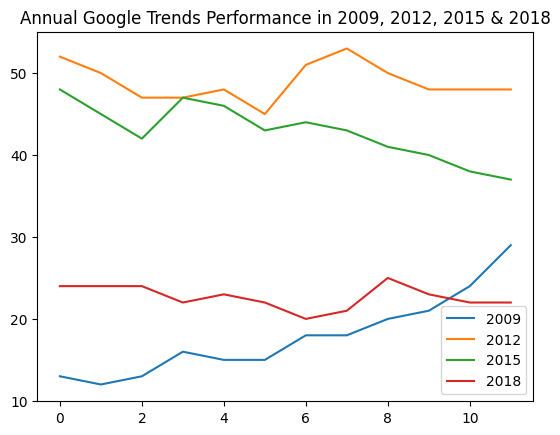

In [8]:
chrome_trends.plot(title="Annual Google Trends Performance in 2009, 2012, 2015 & 2018")

## Final Insights
1. **Internet Explorer's Decline**: Internet Explorer initially dominated but began to decline sharply after Chrome's release, with a notable dip around 2009-2010.
2. **The Rise of Google Chrome**: Chrome quickly overtook other browsers, particularly gaining momentum between 2009 and 2015.
3. **Stability of Safari**: Safari shows steady growth, largely due to Apple's device ecosystem.
4. **Opera's Small Market**: Opera maintained a niche following, but it did not compete strongly with other major players.
